In [ ]:
# !pip install datasets

In [24]:
from datasets import load_dataset
dataset = load_dataset("openfoodfacts/product-database")
print(dataset)

Loading dataset shards:   0%|          | 0/58 [00:00<?, ?it/s]

DatasetDict({
    food: Dataset({
        features: ['additives_n', 'additives_tags', 'allergens_tags', 'brands_tags', 'brands', 'categories', 'categories_tags', 'checkers_tags', 'ciqual_food_name_tags', 'cities_tags', 'code', 'compared_to_category', 'complete', 'completeness', 'correctors_tags', 'countries_tags', 'created_t', 'creator', 'data_quality_errors_tags', 'data_quality_info_tags', 'data_quality_warnings_tags', 'data_sources_tags', 'ecoscore_data', 'ecoscore_grade', 'ecoscore_score', 'ecoscore_tags', 'editors', 'emb_codes_tags', 'emb_codes', 'entry_dates_tags', 'food_groups_tags', 'generic_name', 'images', 'informers_tags', 'ingredients_analysis_tags', 'ingredients_from_palm_oil_n', 'ingredients_n', 'ingredients_original_tags', 'ingredients_percent_analysis', 'ingredients_tags', 'ingredients_text', 'ingredients_with_specified_percent_n', 'ingredients_with_unspecified_percent_n', 'ingredients_without_ciqual_codes_n', 'ingredients_without_ciqual_codes', 'ingredients', 'known_ing

In [25]:
food_data = dataset['food']

In [ ]:
# !pip install datasets duckdb

In [27]:
arrow_table = food_data.data.table

In [28]:
import duckdb
con = duckdb.connect()

In [29]:
con.register('food_table', arrow_table)

In [30]:
schema_df = con.execute("""DESCRIBE food_table""").fetchdf()
print(schema_df)
schema_df.to_csv('food_table_schema.csv', index=False)

                       column_name column_type null   key default extra
0                      additives_n     INTEGER  YES  None    None  None
1                   additives_tags   VARCHAR[]  YES  None    None  None
2                   allergens_tags   VARCHAR[]  YES  None    None  None
3                      brands_tags   VARCHAR[]  YES  None    None  None
4                           brands     VARCHAR  YES  None    None  None
..                             ...         ...  ...   ...     ...   ...
104          unknown_ingredients_n     INTEGER  YES  None    None  None
105         unknown_nutrients_tags   VARCHAR[]  YES  None    None  None
106                  vitamins_tags   VARCHAR[]  YES  None    None  None
107  with_non_nutritive_sweeteners     INTEGER  YES  None    None  None
108                with_sweeteners     INTEGER  YES  None    None  None

[109 rows x 6 columns]


In [31]:
total_rows = con.execute("SELECT COUNT(*) AS total_rows FROM food_table").fetchone()[0]
print(total_rows)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

3604999


In [32]:
example_row_df = con.execute("SELECT * FROM food_table LIMIT 1").fetchdf()
print(example_row_df)
example_row_df.to_csv('example_row_df.csv', index=False)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   additives_n additives_tags allergens_tags brands_tags   brands  \
0          NaN            NaN      [en:nuts]   [bovetti]  Bovetti   

                                          categories  \
0  Petit-déjeuners,Produits à tartiner,Produits à...   

                                     categories_tags checkers_tags  \
0  [en:breakfasts, en:spreads, en:sweet-spreads, ...            []   

               ciqual_food_name_tags cities_tags  ...  \
0  [chocolate-spread-with-hazelnuts]          []  ...   

                                         states_tags stores_tags  stores  \
0  [en:to-be-completed, en:nutrition-facts-comple...          []           

   traces_tags unique_scans_n unknown_ingredients_n  unknown_nutrients_tags  \
0           []            NaN                   NaN                      []   

  vitamins_tags with_non_nutritive_sweeteners with_sweeteners  
0            []                           NaN             NaN  

[1 rows x 109 columns]


In [36]:
sample_query = """
  SELECT *
  FROM food_table
  LIMIT 10000
"""

try:
    df = con.execute(sample_query).df()
except Exception as e:
    print("Error:", e)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
# SAMPLE_SIZE = 10000
# total_rows_result = con.execute("SELECT COUNT(*) FROM food_table").fetchone()
# total_rows = total_rows_result[0] if total_rows_result else 0
# sample_percentage = (SAMPLE_SIZE / total_rows) * 100

# if sample_percentage > 100:
#     sample_percentage = 100

# sample_query = f"""
#   SELECT *
#   FROM food_table
#   TABLESAMPLE ({sample_percentage})
# """

# try:
#     df = con.execute(sample_query).df()
#     print(f"Sampled Data Shape: {df.shape}")
# except Exception as e:
#     print("Error during sampling:", e)

In [37]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("Column Data Types:")
print(df.dtypes)

Number of Rows: 10000
Number of Columns: 109
Column Data Types:
additives_n                      float64
additives_tags                    object
allergens_tags                    object
brands_tags                       object
brands                            object
                                  ...   
unknown_ingredients_n            float64
unknown_nutrients_tags            object
vitamins_tags                     object
with_non_nutritive_sweeteners    float64
with_sweeteners                  float64
Length: 109, dtype: object


In [38]:
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
print("Summary for Numerical Columns ---")
print(df[numerical_cols].describe())

Summary for Numerical Columns ---
       additives_n      complete  completeness     created_t  ecoscore_score  \
count  9653.000000  10000.000000  10000.000000  1.000000e+04     2636.000000   
mean      2.911841      0.000300      0.504928  1.489353e+09       51.937026   
std       3.650301      0.017319      0.084636  1.194404e+07       20.913008   
min       0.000000      0.000000      0.062500  1.340913e+09      -20.000000   
25%       0.000000      0.000000      0.500000  1.489062e+09       35.000000   
50%       2.000000      0.000000      0.500000  1.489069e+09       50.000000   
75%       4.000000      0.000000      0.500000  1.489093e+09       72.000000   
max      27.000000      1.000000      1.100000  1.722539e+09      112.000000   

       ingredients_from_palm_oil_n  ingredients_n  \
count                  9639.000000    9653.000000   
mean                      0.001556      17.127629   
std                       0.039420      16.615202   
min                       0.00000

In [39]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
for col in categorical_cols:
  print(f"Column: {col}")
  print(df[col].value_counts(dropna=False).head())

Column: additives_tags
additives_tags
[en:e330]     453
NaN           284
[en:e415]      76
[en:e160b]     65
[en:e150c]     56
Name: count, dtype: int64
Column: allergens_tags
allergens_tags
[en:milk]        975
[en:gluten]      418
[en:soybeans]    389
[en:nuts]        183
[en:gelatin]     137
Name: count, dtype: int64
Column: brands_tags
brands_tags
[kroger]               1614
[roundy-s]             1276
[spartan]              1205
[private-selection]     236
[the-kroger-co]         222
Name: count, dtype: int64
Column: brands
brands
Kroger                     1614
Roundy's                   1276
Spartan                    1205
Kroger,  The Kroger Co.     284
None                        265
Name: count, dtype: int64
Column: categories
categories
None                                                          1150
Snacks                                                         645
Condiments, Sauces, Groceries                                  352
Salted snacks                           

In [40]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

owner                     10000
owner_fields              10000
photographers              9997
new_additives_n            9995
with_sweeteners            9850
                          ...  
unknown_nutrients_tags        8
ciqual_food_name_tags         6
minerals_tags                 2
nucleotides_tags              2
vitamins_tags                 2
Length: 69, dtype: int64


In [43]:
completeness_stats = df.notna().mean() * 100
print(completeness_stats)

additives_n        96.53
additives_tags     97.16
allergens_tags    100.00
brands_tags        98.84
brands             97.35
                   ...  
sugars              0.00
salt                0.00
proteins            0.00
carbohydrates       0.00
saturated-fat       0.00
Length: 116, dtype: float64


In [46]:
print(df['nutriments'].iloc[0])
print(type(df['nutriments'].iloc[0]))
print(df['nutriments'].head())

[{'name': 'sugars', 'value': 32.0, '100g': 32.0, 'serving': None, 'unit': 'g', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}
 {'name': 'energy', 'value': 617.0, '100g': 2582.0, 'serving': None, 'unit': 'kcal', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}
 {'name': 'fat', 'value': 48.0, '100g': 48.0, 'serving': None, 'unit': 'g', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}
 {'name': 'energy-kcal', 'value': 617.0, '100g': 617.0, 'serving': None, 'unit': 'kcal', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}
 {'name': 'proteins', 'value': 8.0, '100g': 8.0, 'serving': None, 'unit': 'g', 'prepared_value': None, 'prepared_100g': None, 'prepared_serving': None, 'prepared_unit': None}
 {'name': 'cocoa', 'value': 17.520000457763672, '100g': 17.520000457763672, 'serving': 17.520000457763672, 'unit

In [50]:
import numpy as np
all_nutrient_names = set()
for nutriments in df['nutriments']:
    if isinstance(nutriments, (list, np.ndarray)):
        for item in nutriments:
            if isinstance(item, dict) and 'name' in item:
                all_nutrient_names.add(item['name'])
print(f"Unique nutrient names: {all_nutrient_names}")

Unique nutrient names: {'zinc', 'cocoa', 'polyols', 'salt', 'protein-dry-substance', 'folates', 'potassium', 'arachidic-acid', 'en-sucres-ajoutes', 'starch', 'nova-group', 'monounsaturated-fat', 'proteins-dry-substance', 'cholesterol', 'vitamin-a', 'sodium', 'fiber', 'carbon-footprint-from-known-ingredients', 'phylloquinone', 'iodine', 'vitamin-b12', 'behenic-acid', 'polyunsaturated-fat', 'carbohydrates', 'copper', 'trans-fat', 'vitamin-b1', 'saturated-fat', 'vitamin-c', 'alcohol', 'arachidonic-acid', 'pantothenic-acid', 'added-sugars', 'fruits-vegetables-nuts-estimate-from-ingredients', 'fruits-vegetables-nuts', 'vitamin-d', 'soluble-fiber', 'energy-from-fat', 'energy', 'energy-cal', 'manganese', 'vitamin-b6', 'energy-kcal', 'calcium', 'phosphorus', 'vitamin-b2', 'alpha-linolenic-acid', 'fruits-vegetables-legumes-estimate-from-ingredients', 'proteins', 'carbon-footprint-from-meat-or-fish', 'selenium', 'vitamin-k', 'fat', 'caffeine', 'energy-kj', 'magnesium', 'nutrition-score-fr', 'sug

In [47]:
def extract_nutrient(nutriments, nutrient_name):
  if isinstance(nutriments, (list, np.ndarray)):
      for item in nutriments:
          if isinstance(item, dict) and item.get('name') == nutrient_name:
              return item.get('value')
  return None

key_nutrients = ['energy', 'fat', 'sugars', 'salt', 'proteins', 'carbohydrates', 'saturated-fat']

In [51]:
for nutrient in key_nutrients:
  df[nutrient] = df['nutriments'].apply(lambda x: extract_nutrient(x, nutrient))

In [52]:
print(df[key_nutrients].head())

   energy   fat  sugars       salt   proteins  carbohydrates  saturated-fat
0   617.0  48.0    32.0    0.01000   8.000000      36.000000           10.0
1     0.0   0.0     NaN  750.00000   0.000000      70.000000            NaN
2     0.0   0.0     NaN   10.00000   0.000000       1.470000            NaN
3     0.0   0.0     NaN    0.00000   0.000000      53.330002            NaN
4   267.0   0.0     NaN    0.33782  66.669998      60.000000            NaN


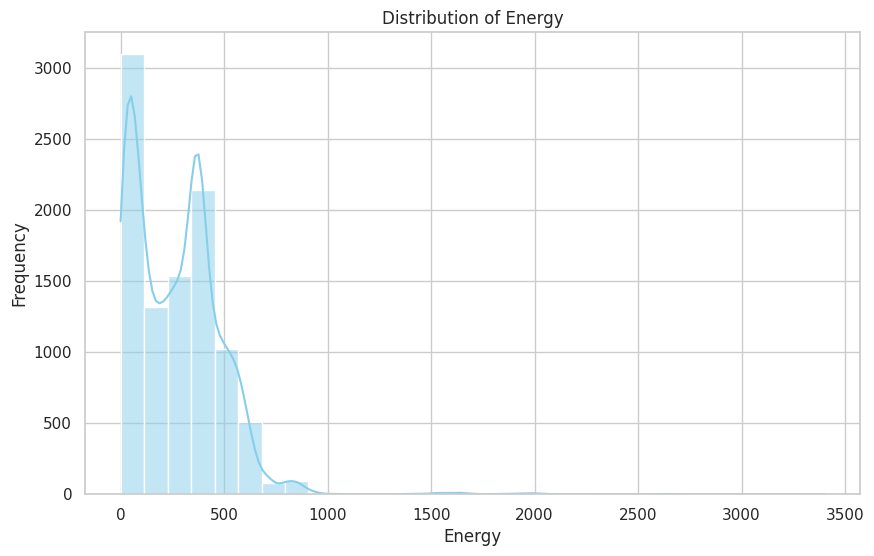

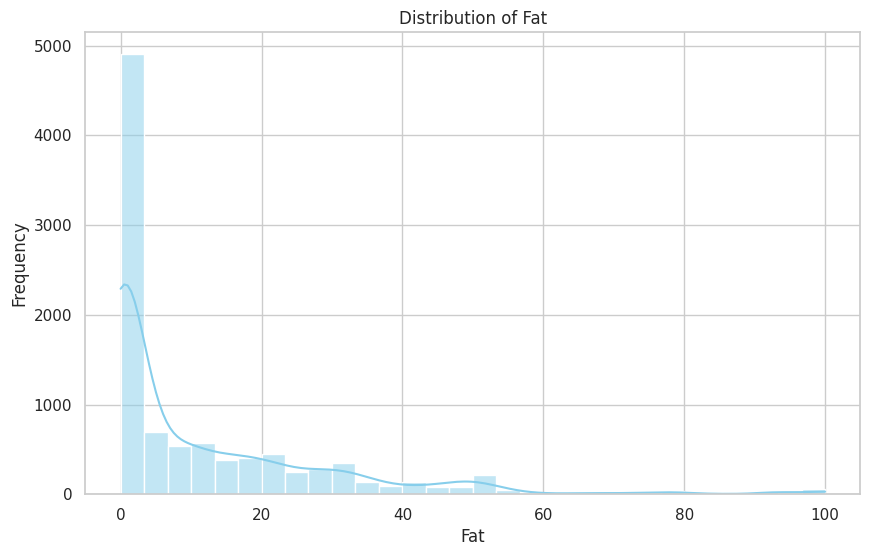

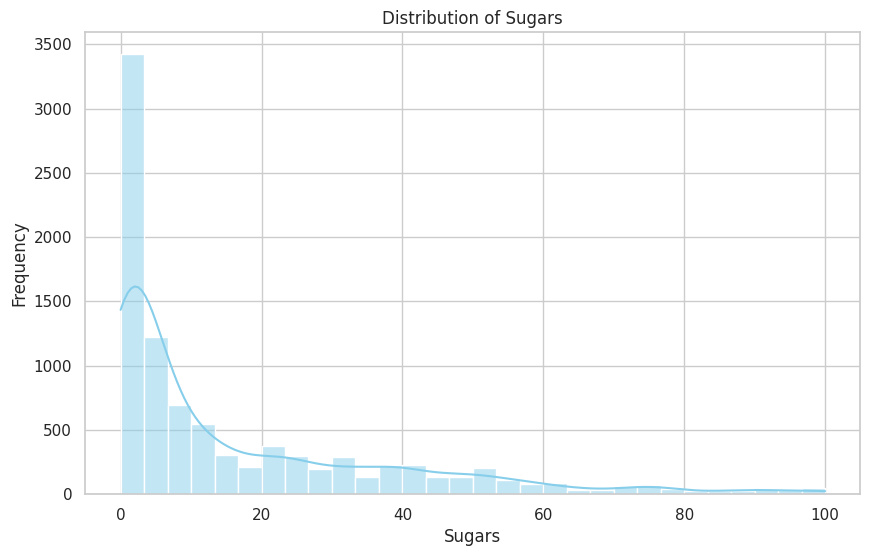

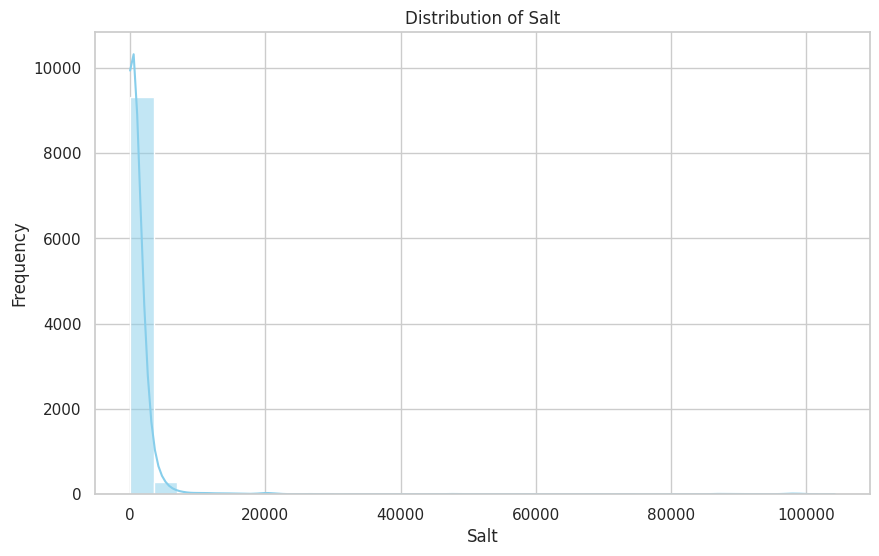

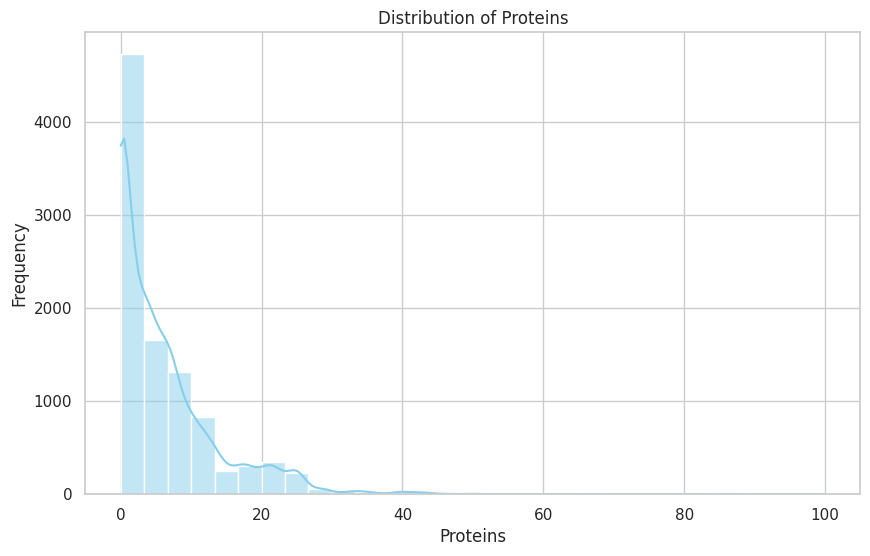

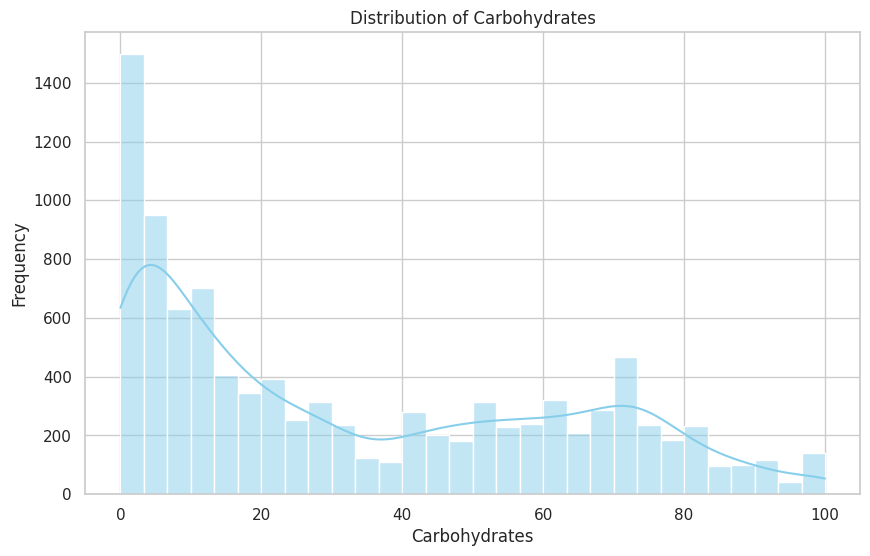

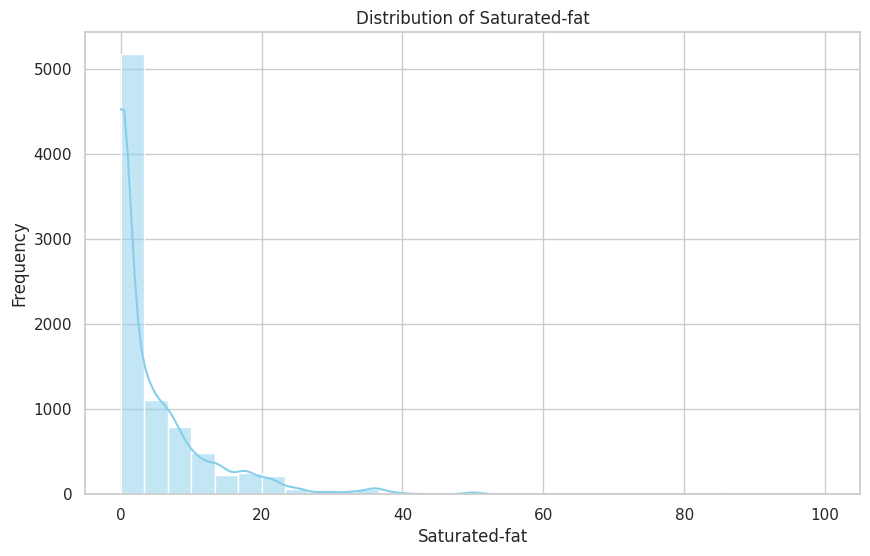

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

for nutrient in key_nutrients:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[nutrient].dropna(), kde=True, bins=30, color='skyblue')
  plt.title(f'Distribution of {nutrient.capitalize()}')
  plt.xlabel(f'{nutrient.capitalize()}')
  plt.ylabel('Frequency')
  plt.show()

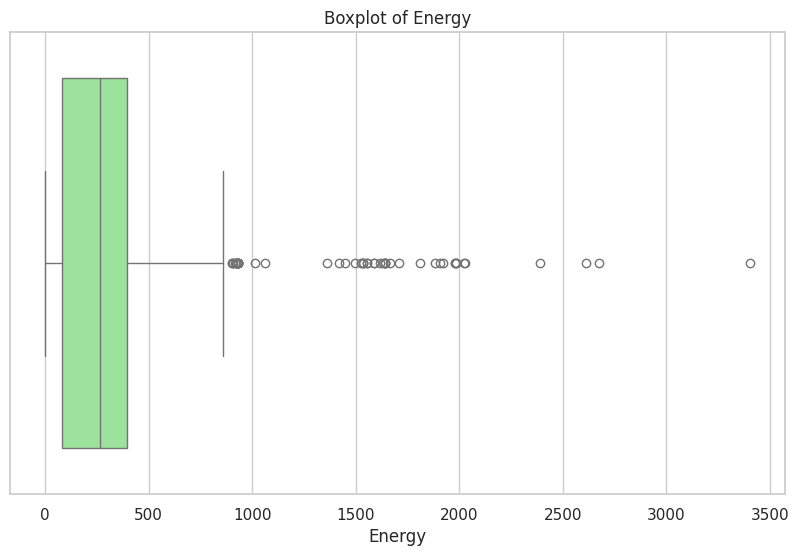

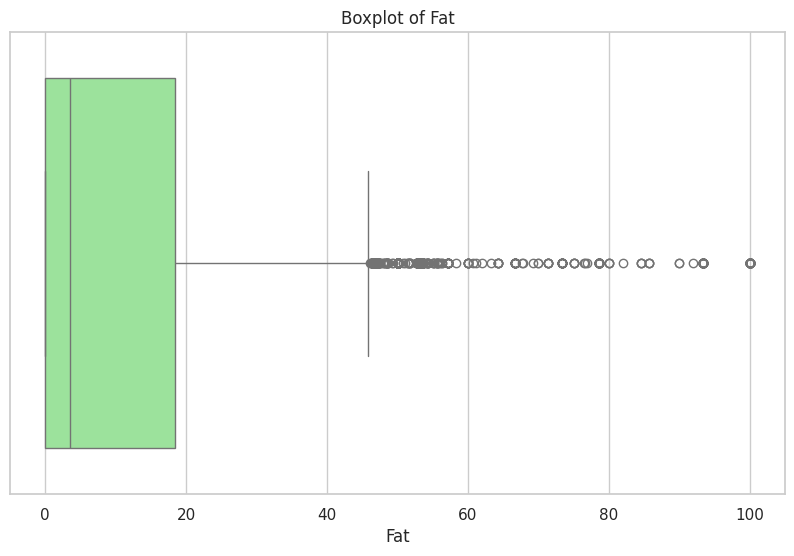

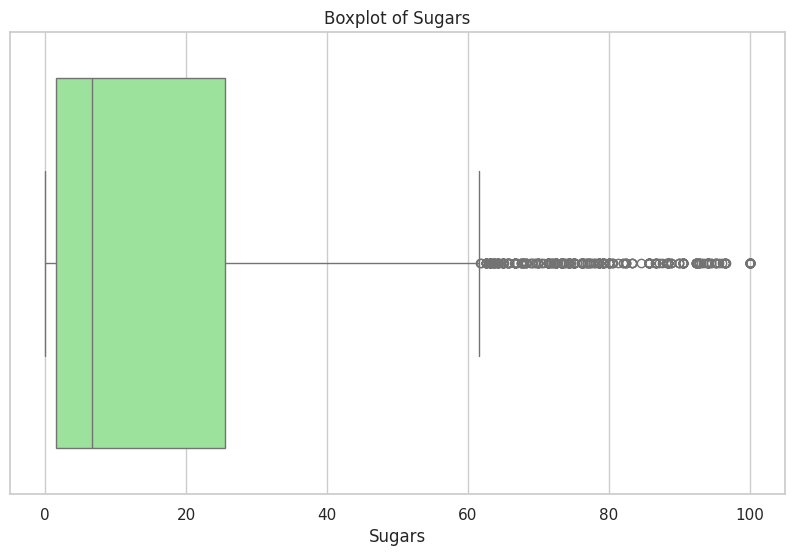

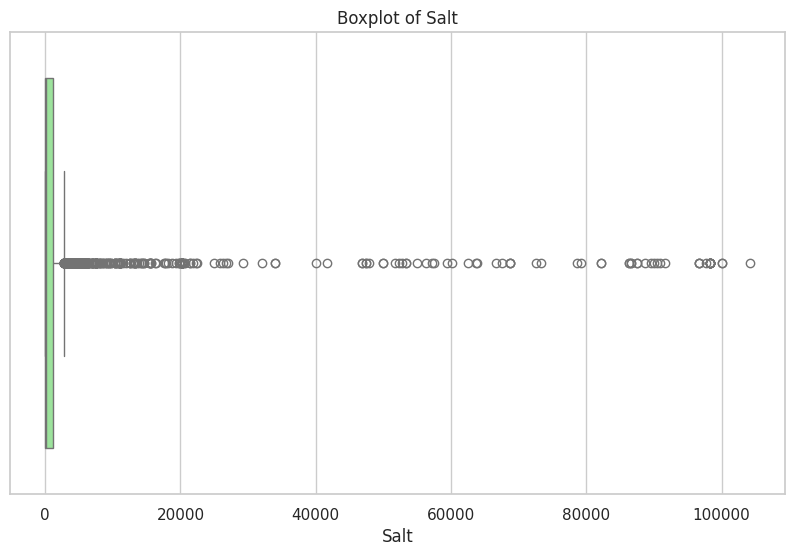

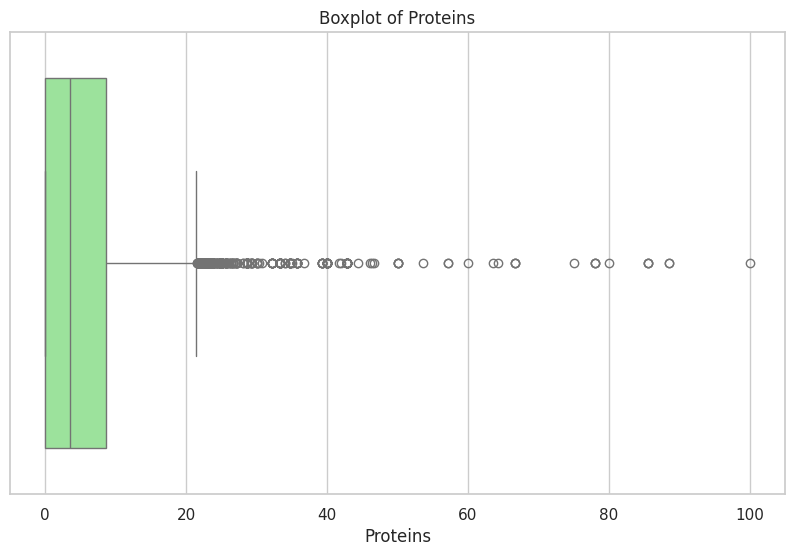

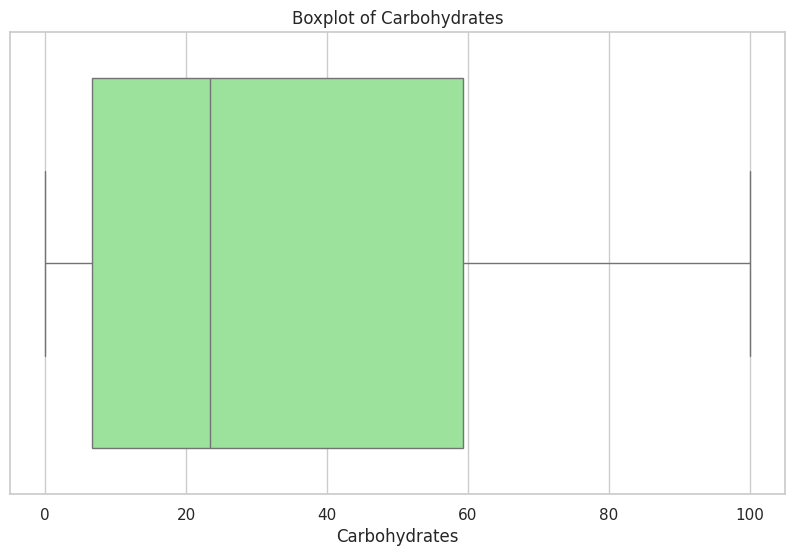

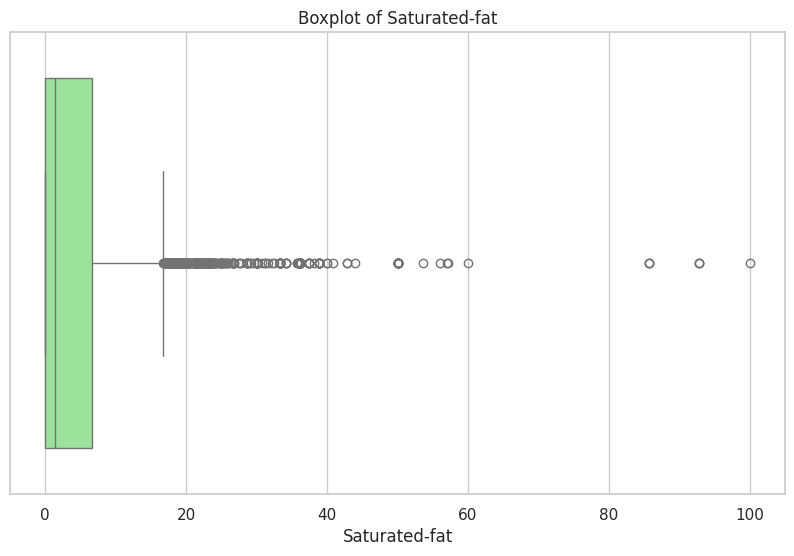

In [56]:
for nutrient in key_nutrients:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[nutrient], color='lightgreen')
  plt.title(f'Boxplot of {nutrient.capitalize()}')
  plt.xlabel(f'{nutrient.capitalize()}')
  plt.show()

<ipython-input-57-70f1383731b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nutriscore_score', data=df, palette='viridis')


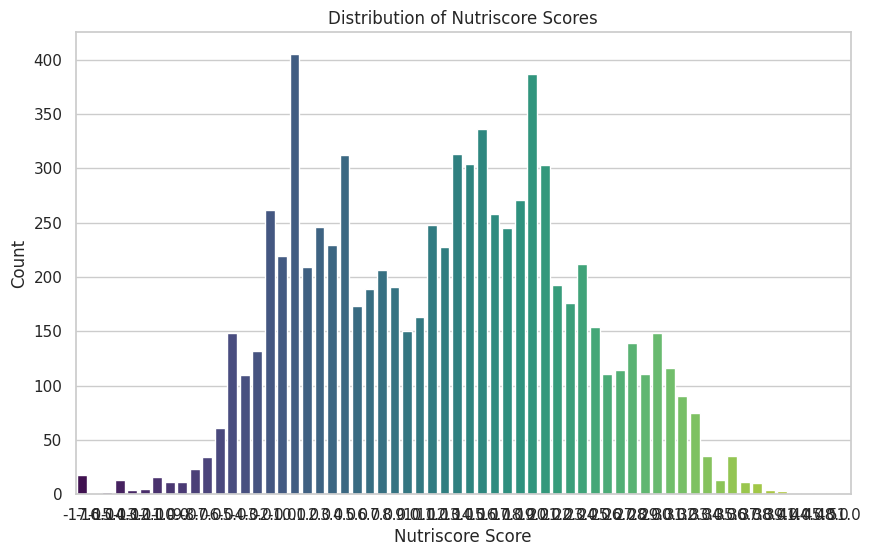

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='nutriscore_score', data=df, palette='viridis')
plt.title('Distribution of Nutriscore Scores')
plt.xlabel('Nutriscore Score')
plt.ylabel('Count')
plt.show()


Top 10 Categories:
categories_tags
[en:snacks]                645
[en:salted-snacks]         279
[en:baking-decorations]    104
[en:frozen-foods]          102
[en:fats]                   51
[en:desserts]               48
[en:meals]                  40
[en:beverages]              34
[en:cooking-helpers]        34
[en:sandwiches]             20
Name: count, dtype: int64


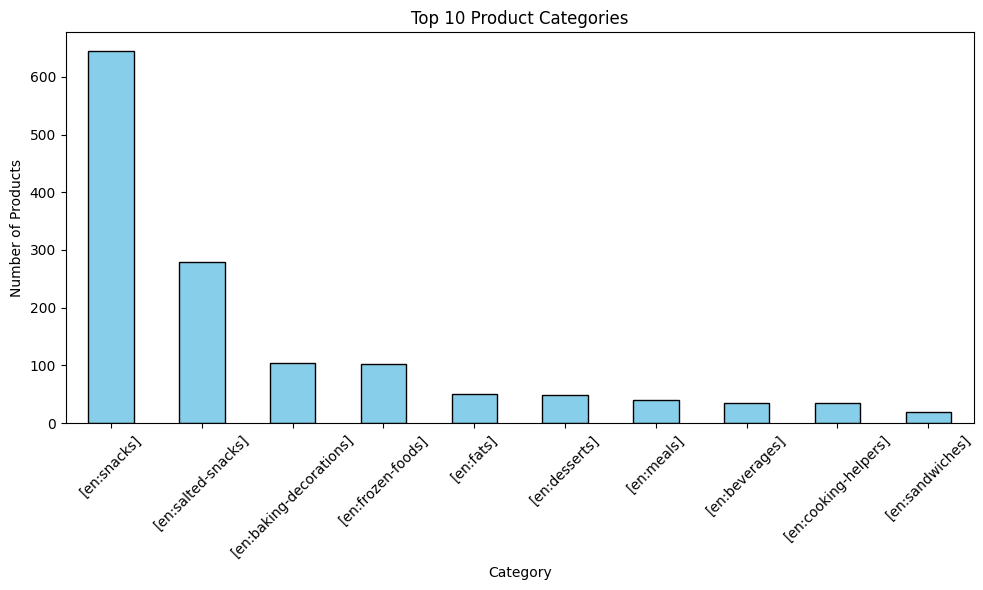

In [15]:
top_categories = df['categories_tags'].value_counts().head(10)
print("\nTop 10 Categories:")
print(top_categories)

top_categories.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
image_availability = df['images'].notna().mean() * 100
print(image_availability)

100.0


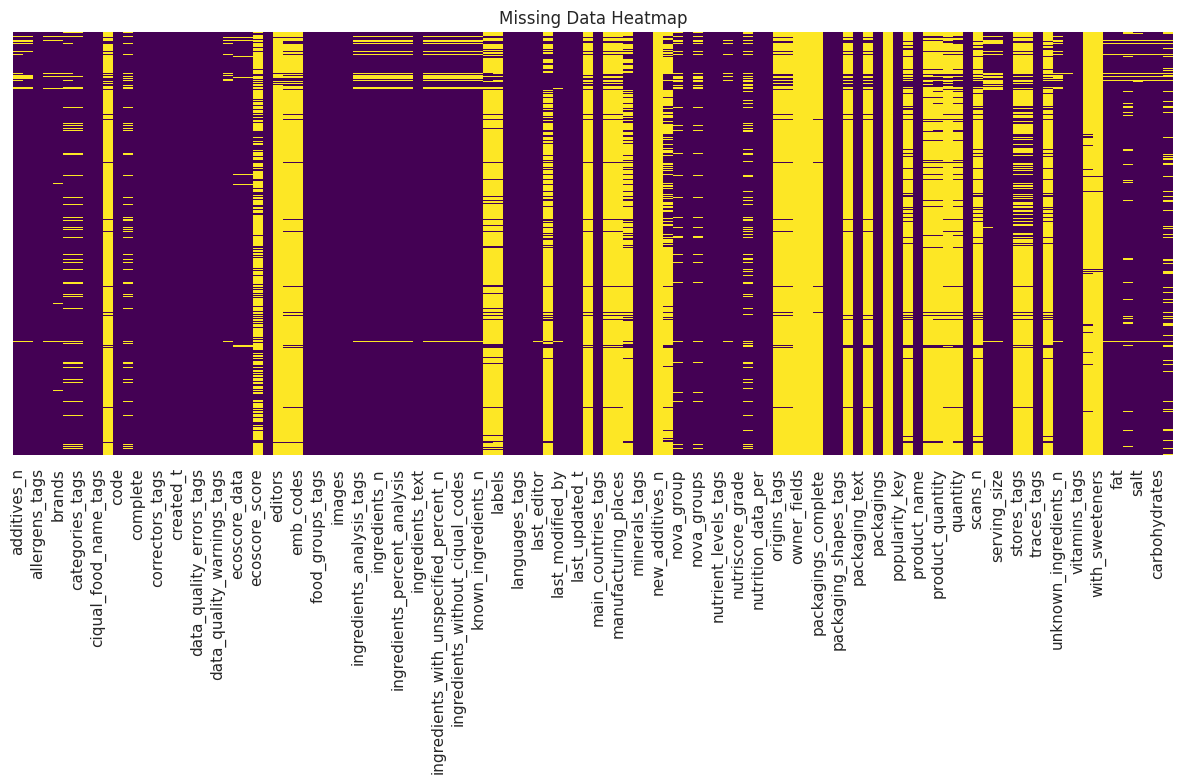

In [58]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.tight_layout()
plt.show()

In [63]:
def extract_product_names(product_names):
  if isinstance(product_names, (list, np.ndarray)):
      return [item['text'] for item in product_names if isinstance(item, dict) and 'text' in item]
  return []

df['product_name_text'] = df['product_name'].apply(extract_product_names)
all_product_names = df['product_name_text'].explode().dropna().astype(str)
# df['product_name_length'] = all_product_names.apply(len)
print(all_product_names.head())

0    Véritable pâte à tartiner noisettes chocolat noir
0    Véritable pâte à tartiner noisettes chocolat noir
1                         Lagg's, chamomile herbal tea
1                         Lagg's, chamomile herbal tea
2                       Lagg's, herbal tea, peppermint
Name: product_name_text, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-67-c2fc8eff1a81>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')


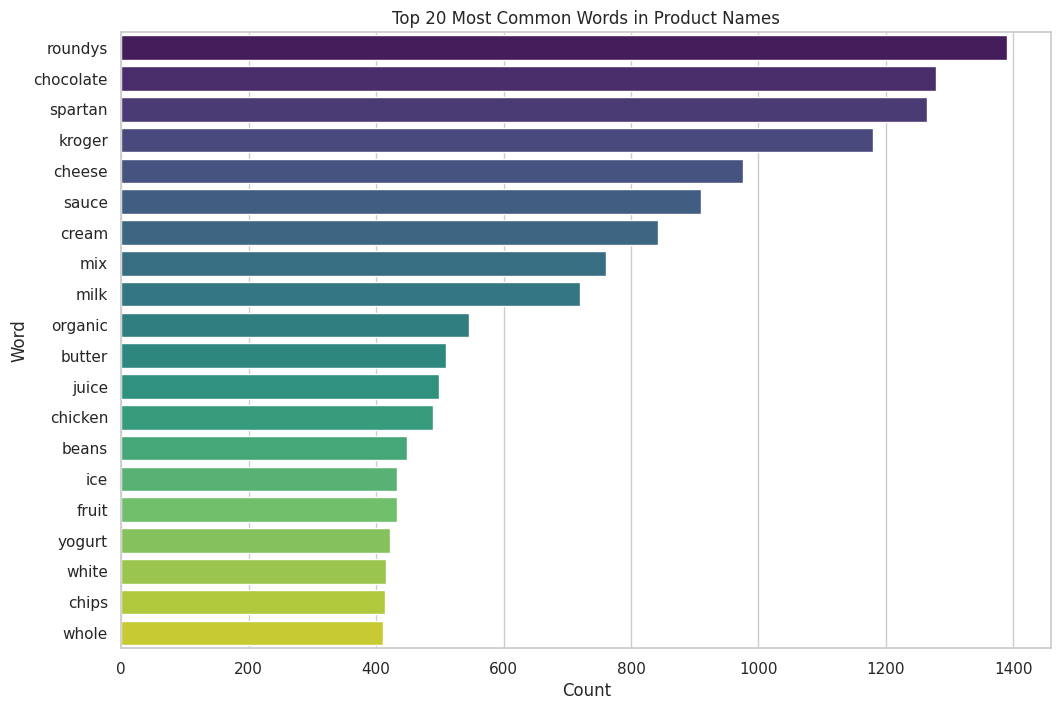

In [67]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import pandas as pd

nltk.download('stopwords')

all_names_str = ' '.join(all_product_names).lower()

all_names_str = all_names_str.translate(str.maketrans('', '', string.punctuation))

tokens = all_names_str.split()

stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(tokens)

top_20_words = word_counts.most_common(20)

top_words_df = pd.DataFrame(top_20_words, columns=['Word', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 20 Most Common Words in Product Names')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

<ipython-input-69-d89cee39d8ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='magma')


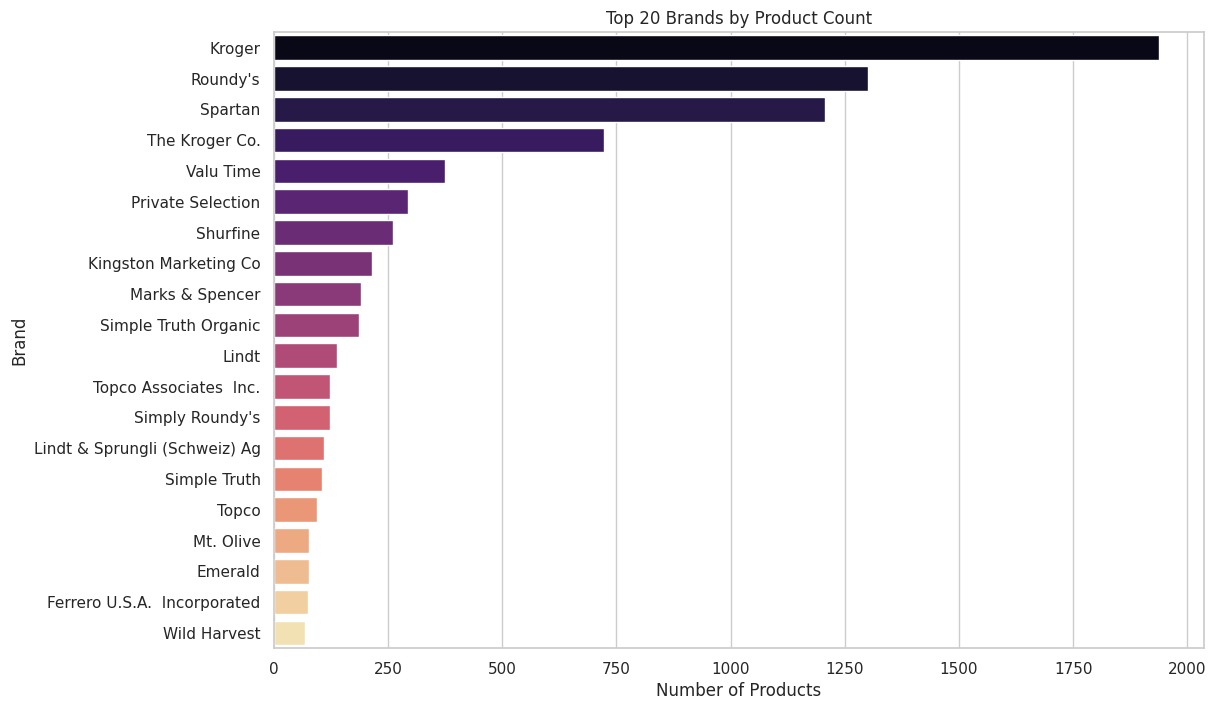

In [69]:
df['brands_list'] = df['brands'].fillna('').apply(lambda x: [brand.strip() for brand in x.split(',') if brand.strip()])
all_brands = df['brands_list'].explode().dropna().astype(str)
brand_counts = all_brands.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='magma')
plt.title('Top 20 Brands by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

<ipython-input-70-57f10ba2c1c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nutriscore_grade', data=df, palette='viridis', order=nutriscore_grade_counts.index)


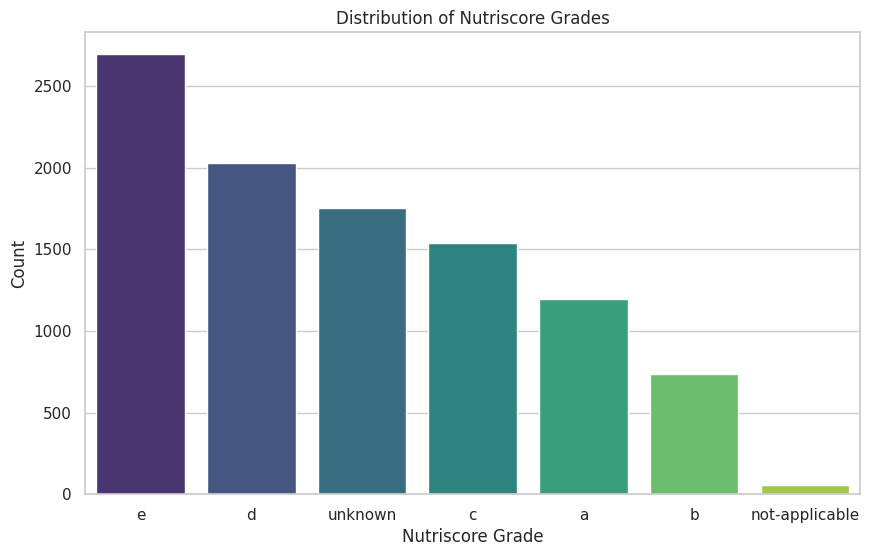

In [70]:
nutriscore_grade_counts = df['nutriscore_grade'].fillna('Unknown').value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='nutriscore_grade', data=df, palette='viridis', order=nutriscore_grade_counts.index)
plt.title('Distribution of Nutriscore Grades')
plt.xlabel('Nutriscore Grade')
plt.ylabel('Count')
plt.show()

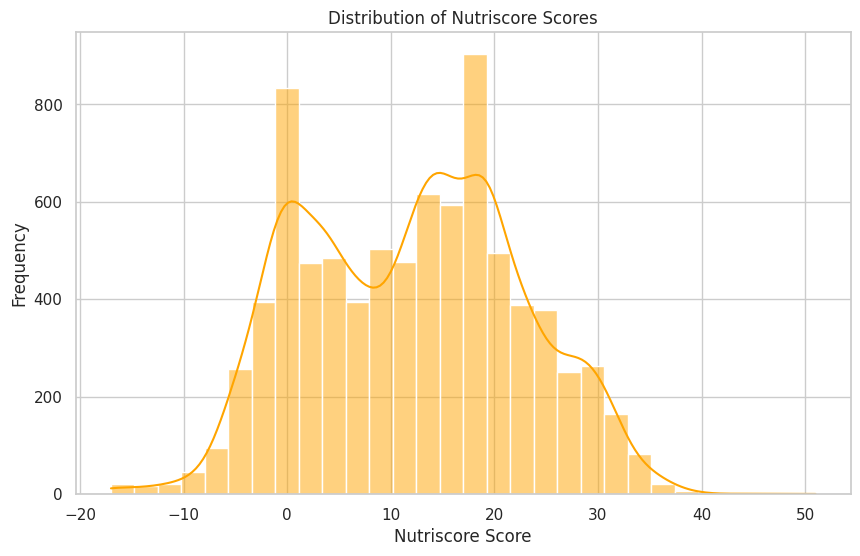

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df['nutriscore_score'].dropna(), kde=True, bins=30, color='orange')
plt.title('Distribution of Nutriscore Scores')
plt.xlabel('Nutriscore Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-73-1329645358ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='PuBu')


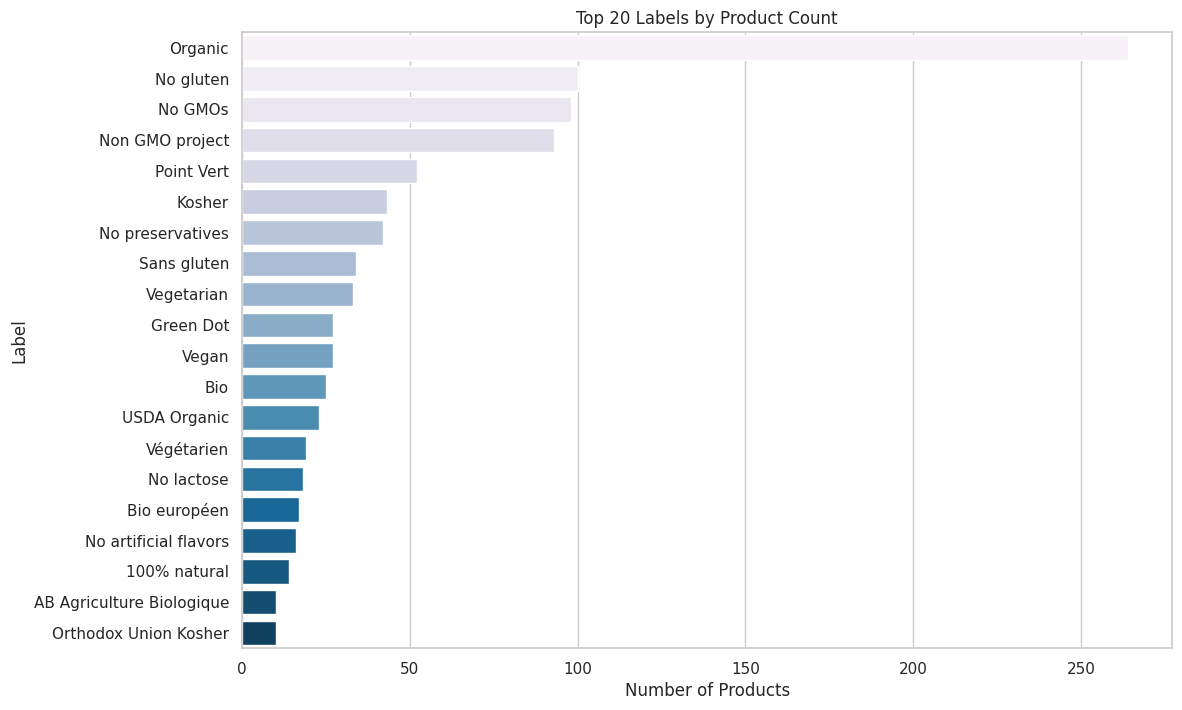

In [73]:
df['labels_list'] = df['labels'].fillna('').apply(lambda x: [label.strip() for label in x.split(',') if label.strip()])
all_labels = df['labels_list'].explode().dropna().astype(str)
label_counts = all_labels.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='PuBu')
plt.title('Top 20 Labels by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Label')
plt.show()

<ipython-input-76-40501563d01d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=packaging_counts.values, y=packaging_counts.index, palette='YlGnBu')


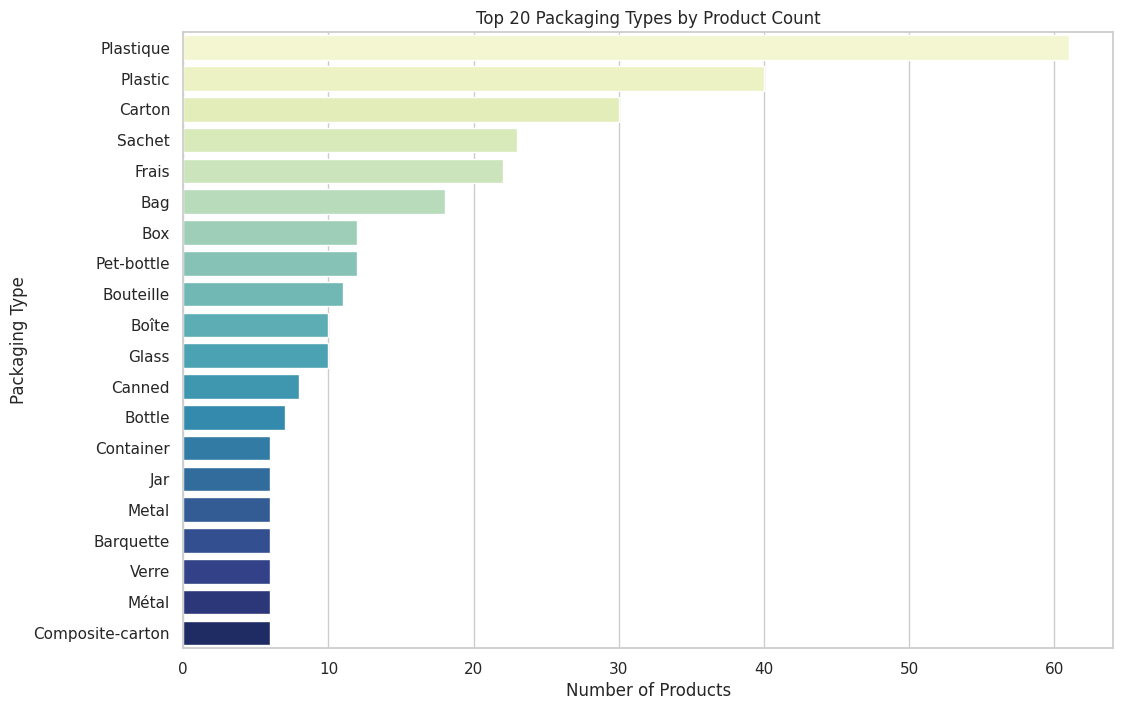

In [76]:
df['packaging_list'] = df['packaging'].fillna('').apply(lambda x: [pack.strip() for pack in x.split(',') if pack.strip()])
all_packaging = df['packaging_list'].explode().dropna().astype(str)
packaging_counts = all_packaging.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=packaging_counts.values, y=packaging_counts.index, palette='YlGnBu')
plt.title('Top 20 Packaging Types by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Packaging Type')
plt.show()

<ipython-input-77-817be9b6f9ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='Spectral')


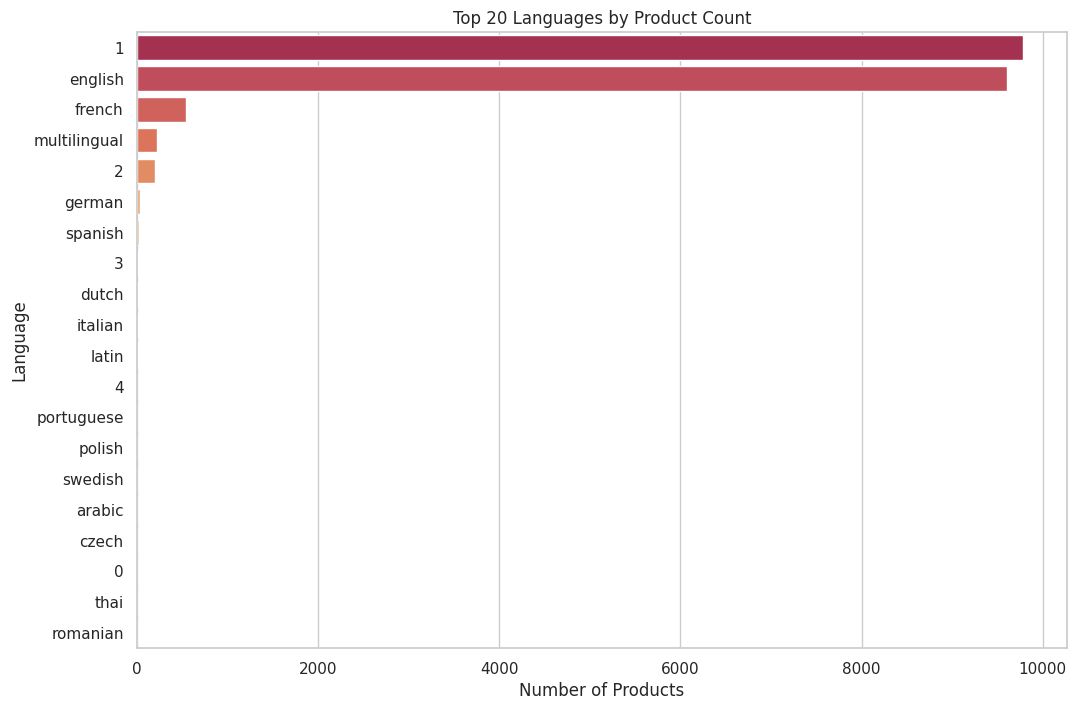

In [77]:
df['languages_list'] = df['languages_tags'].apply(lambda x: [lang.split(':')[1] for lang in x] if isinstance(x, (list, np.ndarray)) else [])
all_languages = df['languages_list'].explode().dropna().astype(str)
language_counts = all_languages.value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='Spectral')
plt.title('Top 20 Languages by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Language')
plt.show()

<ipython-input-78-399e4cbf5063>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trace_counts.values, y=trace_counts.index, palette='cubehelix')


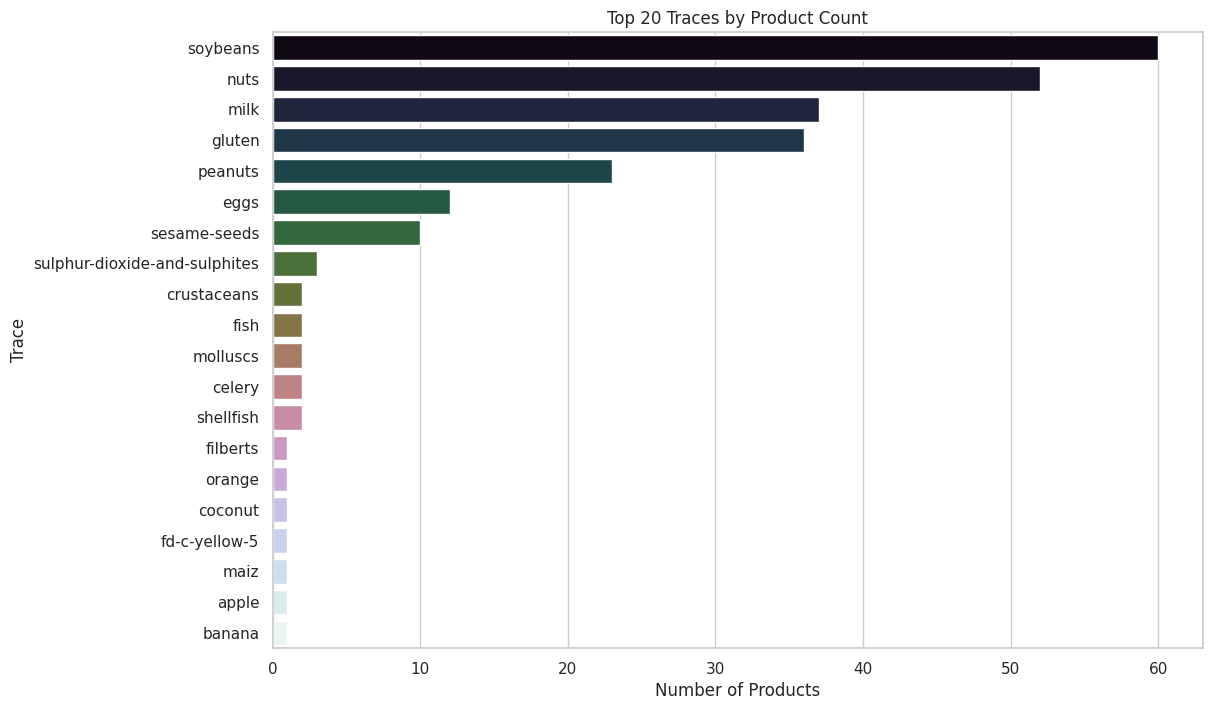

In [78]:
df['traces_list'] = df['traces_tags'].apply(lambda x: [trace.split(':')[1] for trace in x] if isinstance(x, (list, np.ndarray)) else [])

all_traces = df['traces_list'].explode().dropna().astype(str)
trace_counts = all_traces.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=trace_counts.values, y=trace_counts.index, palette='cubehelix')
plt.title('Top 20 Traces by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Trace')
plt.show()